### Fake News Detection

In [220]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import re
import string

In [221]:
# Load the data

df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

In [222]:
# First view of the data

df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [223]:
# Number of rows and columns

df_fake.shape

(23481, 4)

In [224]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [225]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [226]:
df_true.shape

(21417, 4)

In [227]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [228]:
# Adding a new column: giving a class to fake and true news

df_fake["class"] = 0
df_true["class"] = 1

In [229]:
df_true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [230]:
df_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [231]:
# Merge the fake and true database

df_marge = pd.concat([df_fake, df_true], axis=0)
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [232]:
# Since we don't need the columns 'title', 'subject', and 'date', we dropped it

df = df_marge.drop(['title', 'subject', 'date'], axis=1)

In [233]:
df.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [234]:
# The next fuction clean the text from extra space, special caracters, URL, and lowercase

def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [235]:
# In order to clean our Database text, we apply the previous fuction to our column 'text'

df["text"] = df["text"].apply(wordopt)

In [236]:
df.head()

,text,class
0,donald trump just couldn t wish all americans ...,0
1,house intelligence committee chairman devin nu...,0
2,on friday it was revealed that former milwauk...,0
3,on christmas day donald trump announced that ...,0
4,pope francis used his annual christmas day mes...,0


In [237]:
# Shuffling
df = df.sample(frac = 1)

In [238]:
# Reset Index: 0, 1, 2...
df.reset_index(inplace = True)

In [239]:
# Deleting Index colum
df.drop(["index"], axis = 1, inplace = True)
df.head()

,text,class
0,planned parenthood clinics have long been targ...,0
1,washington reuters u s president donald t...,1
2,the russian attacks on our election were far m...,0
3,pelosi claims to have not had a meeting with ...,0
4,washington reuters republican efforts to o...,1


In [298]:
df.shape

(44898, 2)

In [299]:
x = df["text"]
y = df["class"]

In [346]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [347]:
x_train

18154    he skips nancy reagan and antonin scalia s fun...
11151    another positive step towards restoring our fr...
21880     reuters    republican senator rand paul said ...
13068    london  reuters    u s  president elect donald...
4659     a new report has just revealed that fox news p...
                               ...                        
15390     reuters    russian president vladimir putin s...
21637    washington  reuters    president barack obama ...
38007    washington  reuters    two major u s  health i...
9561     republicans in texas  including gov  greg abbo...
39813    london  reuters    britain and the united stat...
Name: text, Length: 33673, dtype: object

In [348]:
y_train

18154    0
11151    0
21880    1
13068    1
4659     0
        ..
15390    1
21637    1
38007    1
9561     0
39813    1
Name: class, Length: 33673, dtype: int64

## Text to Vectors

In [349]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [350]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Confusion Matrix

In [351]:
from sklearn.metrics import plot_confusion_matrix

In [359]:
def conf_mat_acc(model):
    disp = plot_confusion_matrix(model, xv_test, y_test, cmap=plt.cm.Blues, values_format='d')
    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print('accuracy: ', np.round(accuracy, 2))
    plt.show()

## Logistic Regression

In [353]:
from sklearn.linear_model import LogisticRegression

In [354]:
# Training Logistic regretion model

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [355]:
pred_lr=LR.predict(xv_test)
pred_lr

array([0, 0, 0, ..., 0, 0, 1])

In [356]:
LR.score(xv_test, y_test)

0.9852115812917595

In [357]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5817
           1       0.98      0.99      0.98      5408

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



accuracy:  0.99


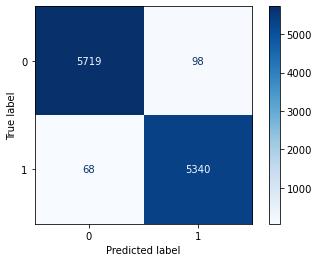

In [360]:
conf_mat_acc(LR)

The Accuracy is as follow (17508+15865)/(17508+15865+152+148)=0.99

17508: in the database the value was 0 but the prediction was 0, so it is correct!

15865: in the database the value was 1 but the prediction was 1, so it is correct! 

152: in the database the value was 0 but the prediction was 1, so it is incorrect

148: in the database the value was 1 but the prediction was 0, so it is incorrect

*The best model would be 0 in the errors (152 & 148) and whole the values in the diagonal*

## Decision Tree Classification

In [253]:
from sklearn.tree import DecisionTreeClassifier

In [254]:
# Training the Decision Tree

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [255]:
pred_dt = DT.predict(xv_test)
pred_dt

array([0, 0, 1, ..., 1, 0, 1])

In [256]:
DT.score(xv_test, y_test)

0.9964365256124722

In [257]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5853
           1       1.00      1.00      1.00      5372

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



accuracy:  1.0


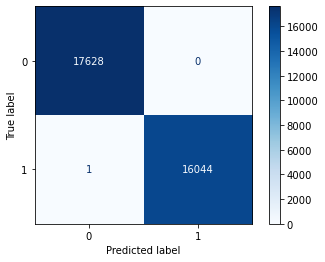

In [258]:
conf_mat_acc(DT)

## Gradient Boosting Classifier

In [259]:
from sklearn.ensemble import GradientBoostingClassifier

In [260]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [261]:
pred_gbc = GBC.predict(xv_test)

In [262]:
GBC.score(xv_test, y_test)

0.9951893095768374

In [263]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5853
           1       0.99      1.00      0.99      5372

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



accuracy:  1.0


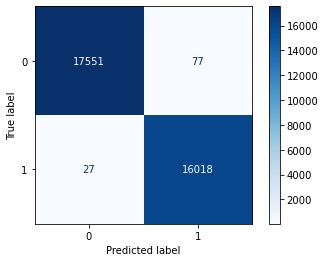

In [264]:
conf_mat_acc(GBC)

## Random Forest Classifier

In [265]:
from sklearn.ensemble import RandomForestClassifier

In [266]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [267]:
pred_rfc = RFC.predict(xv_test)

In [268]:
RFC.score(xv_test, y_test)

0.9895768374164811

In [269]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5853
           1       0.99      0.99      0.99      5372

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



accuracy:  1.0


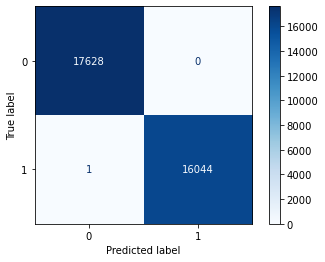

In [270]:
conf_mat_acc(RFC)

# Final Test

In [273]:
news = pd.read_csv('news.csv')
news.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [274]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [275]:
news['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

In [276]:
# Mapping and changing Sex type
news['label'] = news['label'].map({'FAKE':0, 'REAL':1}).astype(int)

In [277]:
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


### TESTING 

In [332]:
new_y_test = news['label']

In [333]:
news["text"] = news["text"].apply(wordopt) 
new_x_test = news["text"]
new_xv_test = vectorization.transform(new_x_test)

## Logistic Reggression 

In [344]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)
pred_LR = LR.predict(new_xv_test)

/Users/keijiarostegui/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [342]:
LR.score(new_xv_test, new_y_test)

0.48524072612470404

In [343]:
print(classification_report(new_y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.49      0.60      0.54      3164
           1       0.48      0.37      0.42      3171

    accuracy                           0.49      6335
   macro avg       0.48      0.49      0.48      6335
weighted avg       0.48      0.49      0.48      6335



## Decision Tree

In [345]:
DT = DecisionTreeClassifier()
DT.fit(xv_test, y_test)
pred_dt = DT.predict(new_xv_test)
print(classification_report(new_y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52      3164
           1       0.50      0.44      0.47      3171

    accuracy                           0.50      6335
   macro avg       0.50      0.50      0.49      6335
weighted avg       0.50      0.50      0.49      6335

